<a href="https://colab.research.google.com/github/Mahdi-N-13/security-adversarioal-dos-attack/blob/main/00_first%20impression%20on%20data%202___security_adversarioal_dos_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data1 = pd.read_csv('https://github.com/rizzaesh/security-adversarioal-dos-attack/blob/main/Dataset/benign_update_benign.csv?raw=1')
data2 = pd.read_csv('https://github.com/rizzaesh/security-adversarioal-dos-attack/blob/main/Dataset/ddos_update_ddos.csv?raw=1')
data1['label'] = 'benign'
data = data1.append(data2)
del data1,data2
data

,ip.src,ip.dst,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,ip.proto,tcp.window_size,tcp.ack,tcp.seq,tcp.len,tcp.stream,tcp.urgent_pointer,tcp.flags,tcp.analysis.ack_rtt,tcp.segments,tcp.reassembled.length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,label
0,167772687,167772674,60.0,1.0,0.0,0.0,0.0,0.0,64.0,6.0,64240.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.0,0.0,0.0,18.148999,3.993568,0.000000,0.000000,benign
1,167772674,167772687,60.0,1.0,0.0,0.0,0.0,0.0,64.0,6.0,5792.0,1.0,0.0,0.0,0.0,0.0,18.0,0.001950,0.0,0.0,0.0,0.0,18.150949,0.001950,0.001950,0.001950,benign
2,167772687,167772674,52.0,1.0,0.0,0.0,0.0,0.0,64.0,6.0,64256.0,1.0,1.0,0.0,0.0,0.0,16.0,0.001929,0.0,0.0,0.0,0.0,18.152878,0.001929,0.003879,0.001929,benign
3,167772687,167772674,124.0,1.0,0.0,0.0,0.0,0.0,64.0,6.0,64256.0,1.0,1.0,72.0,0.0,0.0,24.0,0.000000,0.0,0.0,1.0,0.0,18.153879,0.001001,0.004880,0.001001,benign
4,167772674,167772687,52.0,1.0,0.0,0.0,0.0,0.0,64.0,6.0,5824.0,73.0,1.0,0.0,0.0,0.0,16.0,0.001927,0.0,0.0,0.0,0.0,18.155806,0.001927,0.006807,0.001927,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,167772687,167772674,38.0,0.0,0.0,1995.0,2.0,0.0,64.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,48470.0,55.613330,0.001953,0.000000,0.000000,ddos
1996,167772687,167772674,1500.0,0.0,1.0,0.0,0.0,0.0,64.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,55.614305,0.000975,0.000000,0.000000,ddos
1997,167772687,167772674,38.0,0.0,0.0,1997.0,2.0,0.0,64.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,48470.0,55.615280,0.000975,0.000000,0.000000,ddos
1998,167772687,167772674,1500.0,0.0,1.0,0.0,0.0,0.0,64.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,55.615280,0.000000,0.000000,0.000000,ddos


In [3]:
safe = data['label'] == 'benign'
attc = data['label'] == 'ddos'
l = []
for f in range(len(data.iloc[0])):
  print(data.columns[f],len(set(data.iloc[:,f])))
  if len(set(data.iloc[:,f])) == 1:
    print(set(data.iloc[:,f]))
    # print('\n')
  else:
    l.append(data.columns[f])
data = data[l]
del l

ip.src 3
ip.dst 4
ip.len 10
ip.flags.df 2
ip.flags.mf 2
ip.fragment 596
ip.fragment.count 2
ip.fragments 1
{0.0}
ip.ttl 2
ip.proto 4
tcp.window_size 6
tcp.ack 6
tcp.seq 5
tcp.len 3
tcp.stream 110
tcp.urgent_pointer 1
{0.0}
tcp.flags 6
tcp.analysis.ack_rtt 133
tcp.segments 1
{0.0}
tcp.reassembled.length 1
{0.0}
http.request 2
udp.port 3
frame.time_relative 3089
frame.time_delta 599
tcp.time_relative 414
tcp.time_delta 214
label 2


In [ ]:
safe = np.array(data['label'] == 'benign')
# attc = data['label'] == 'ddos'
attc = np.invert(safe)
n_f = len(data.iloc[0])
for i in range(n_f-1):
  for j in range(i+1):
    plt.scatter(data.iloc[safe,i],data.iloc[safe,j])
    plt.scatter(data.iloc[attc,i],data.iloc[attc,j])
    plt.xlabel(data.columns[i])
    plt.ylabel(data.columns[j])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0561affd0>,
      dtype=object)

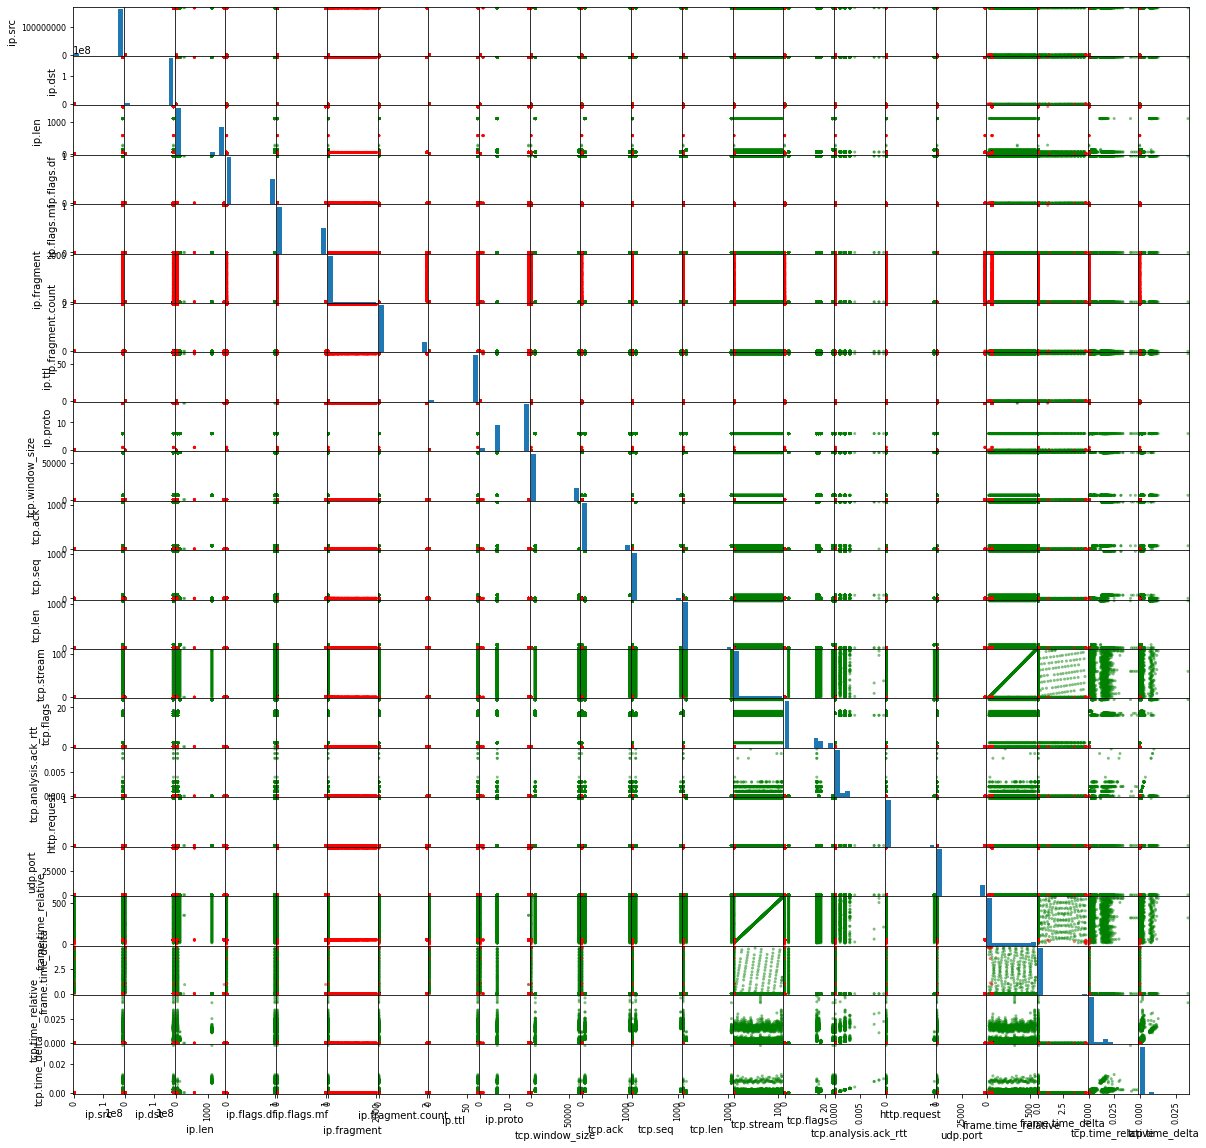

In [5]:
C =  ['r' if x=='ddos' else 'g' for x in data.label]
pd.plotting.scatter_matrix(data, figsize=(20,20), c = C)


In [19]:
print('number of safes:  ' , len(safe),'  ',len(safe)/(len(safe)+len(attc)), ' %')
print('number of attacks:' , len(attc),'  ',len(attc)/(len(safe)+len(attc)), ' %')

number of safes:   3251    0.5  %
number of attacks: 3251    0.5  %


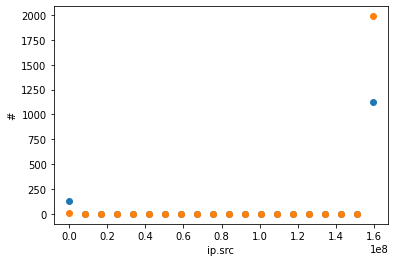

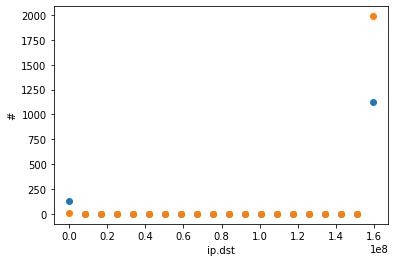

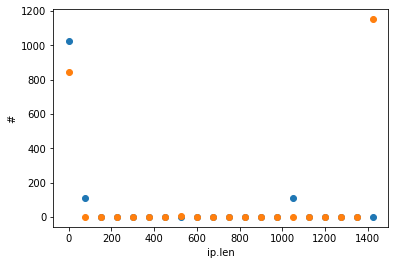

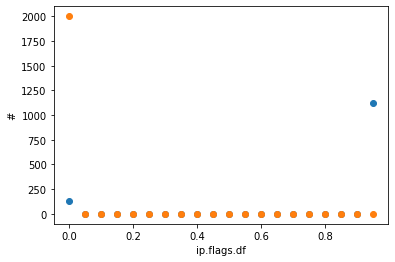

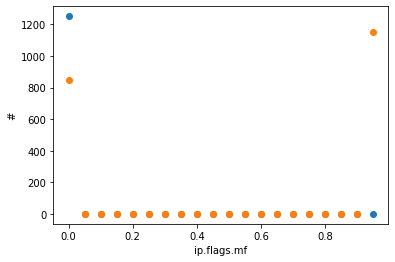

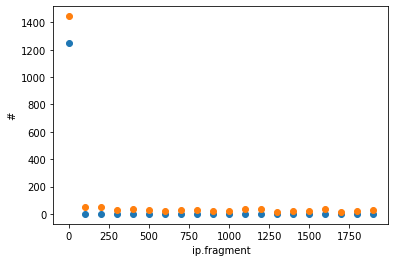

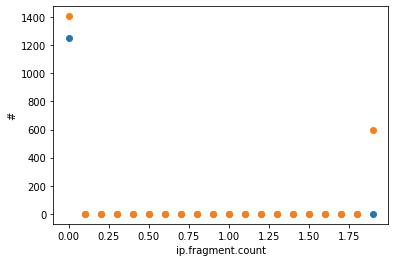

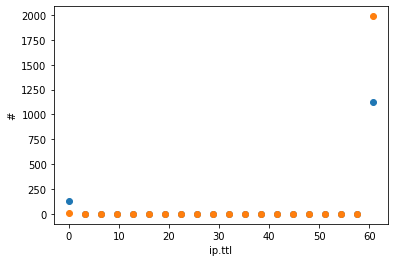

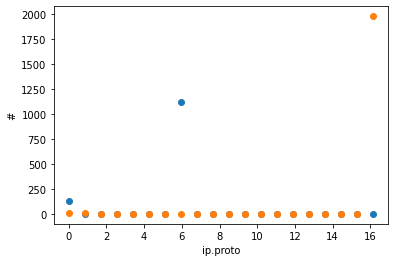

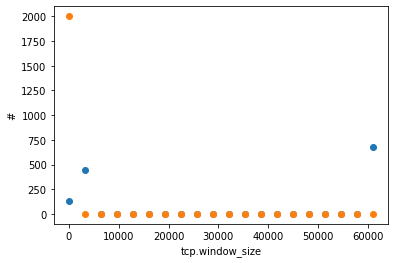

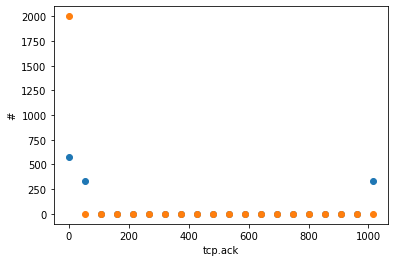

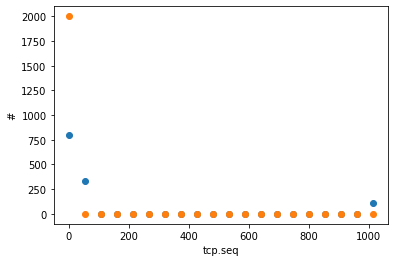

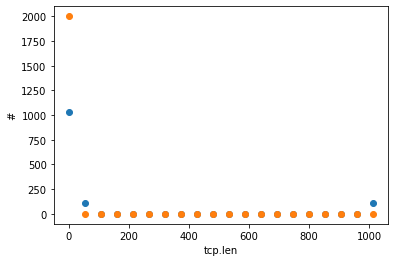

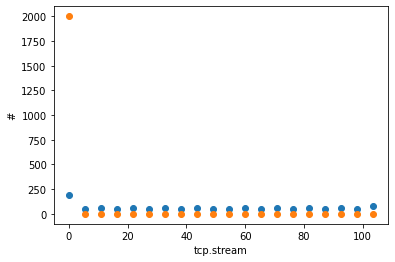

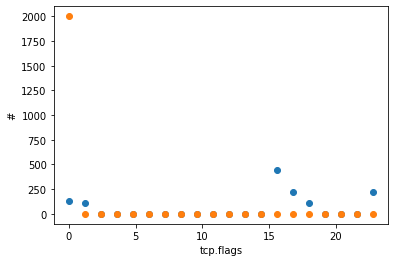

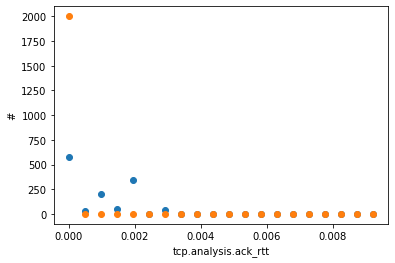

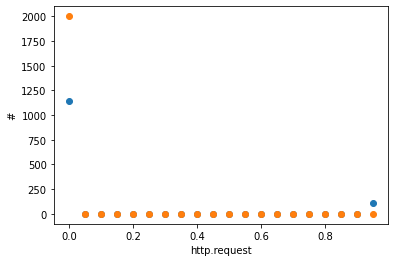

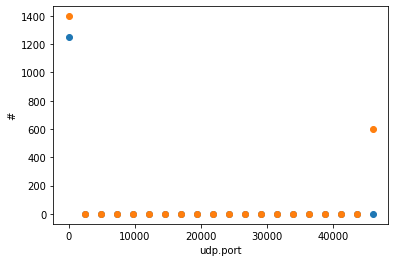

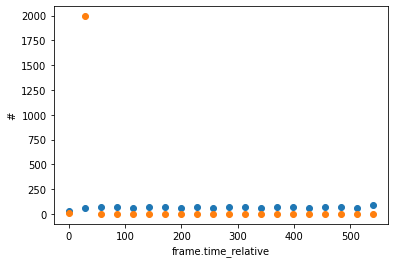

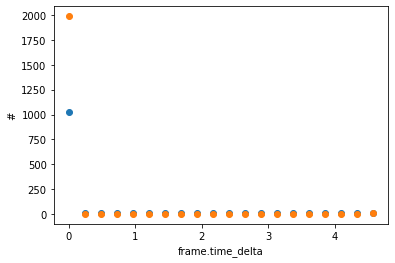

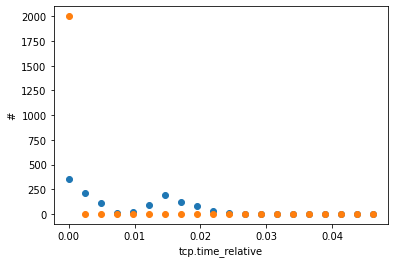

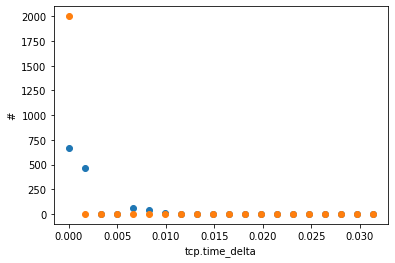

In [32]:
I = np.zeros(n_f-1)
for i in range(n_f-1):
  minn,maxx = data.iloc[:,i].min(),data.iloc[:,i].max()
  Sa,Sax = np.histogram(np.array(data.iloc[safe,i]),range=(minn,maxx),bins=20)
  At,Atx = np.histogram(np.array(data.iloc[attc,i]),range=(minn,maxx),bins=20)
  c = (Sa+At)
  c_s = c.sum()
  nz = Sa!=0
  if nz.any():
    I[i] = (Sa[nz]/c_s*np.log2((Sa[nz]/c_s)/(Sa.sum()/c_s)/(c[nz]/c_s))).sum()
  nz = At!=0
  if nz.any():
    I[i] += (At[nz]/c_s*np.log2((At[nz]/c_s)/(At.sum()/c_s)/(c[nz]/c_s))).sum()
  plt.scatter(Sax[:-1],Sa)
  plt.scatter(Atx[:-1],At)
  plt.xlabel(data.columns[i])
  plt.ylabel('#')
  plt.show()

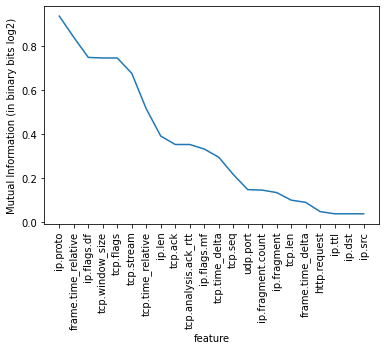

In [33]:
plt.plot(np.flip(np.sort(I)))
plt.xlabel('feature')
plt.xticks(range(n_f-1),data.columns[np.flip(np.argsort(I))],rotation='vertical')
plt.ylabel('Mutual Information (in binary bits log2)')
plt.show()

In [34]:

print ("{:<25} {:<15} ".format('feature','Mutual Information (in binary bits log2)'))
for i in np.flip(np.argsort(I)):
  print("{:<25} {:<15}".format(data.columns[i],np.round(I[i],3)))

feature                   Mutual Information (in binary bits log2) 
ip.proto                  0.935          
frame.time_relative       0.839          
ip.flags.df               0.748          
tcp.window_size           0.745          
tcp.flags                 0.745          
tcp.stream                0.676          
tcp.time_relative         0.515          
ip.len                    0.391          
tcp.ack                   0.353          
tcp.analysis.ack_rtt      0.353          
ip.flags.mf               0.333          
tcp.time_delta            0.296          
tcp.seq                   0.217          
udp.port                  0.149          
ip.fragment.count         0.146          
ip.fragment               0.135          
tcp.len                   0.101          
frame.time_delta          0.091          
http.request              0.049          
ip.ttl                    0.039          
ip.dst                    0.039          
ip.src                    0.039          
